<a href="https://colab.research.google.com/github/martydom/why-do-customer-churn/blob/main/Devashish_Bose_Team_1_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

# **Conclusions**

> Day 1:
*   14.49% of Customers Left
*   State isn't a good parameter to determine the Churn, so we have to consider a composite feature containing State and Area Code.
*   Charges doesn't differ for different Customers. Although, charges differ during different time of days.
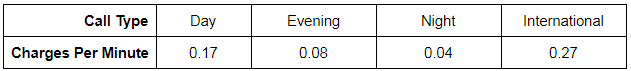
* Although, Charges can't be the reason why customer leaves, but we can draw an average correlation of total charges for every customer. And hence we can find the effictive charges per minute for customer.
* It has also been observed that Customers who Churn generally have more Customer Service Calls than those who stay.
* The Number of days after which most of the customers churn is approximately 105.






# **Code Part**

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
work_dir = '/content/drive/My Drive/AlmaBetter/Module 2/Week 1/'
file_path = 'telecom_churn.csv'
df = pd.read_csv(work_dir+file_path)

In [55]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [56]:
df["State + Arcode"] = df.apply(lambda x : x['State'] + str(x["Area code"]) ,axis=1)

In [57]:
df['Effective Charges Per Min'] = df.apply(lambda x: (x['Total day charge']+x['Total eve charge']+x['Total night charge']+x['Total intl charge'])/(x['Total day minutes']+x['Total eve minutes']+x['Total night minutes']+x['Total intl minutes']),axis=1)

In [58]:
churned_df = df[df['Churn']==True]

In [59]:
retend_df = df[df['Churn']==False]

In [60]:
retend_df.groupby('State')['State'].count().sort_values(ascending = False)

State
WV    96
AL    72
VA    72
WI    71
MN    69
NY    68
OH    68
WY    68
OR    67
VT    65
ID    64
CT    62
UT    62
IN    62
AZ    60
RI    59
MI    57
NC    57
KS    57
CO    57
NM    56
NE    56
ND    56
MO    56
FL    55
MT    54
TX    54
MA    54
MD    53
IL    53
DE    52
OK    52
SD    52
WA    52
NV    52
MS    51
KY    51
HI    50
NJ    50
ME    49
DC    49
AK    49
TN    48
LA    47
NH    47
GA    46
SC    46
AR    44
IA    41
PA    37
CA    25
Name: State, dtype: int64

In [61]:
churned_df.groupby('State')['State'].count().sort_values(ascending = True)

State
AK     3
IA     3
HI     3
AZ     4
LA     4
NE     5
VA     5
TN     5
DC     5
IL     5
NM     6
RI     6
ND     6
WI     7
MO     7
AL     8
GA     8
PA     8
KY     8
FL     8
SD     8
VT     8
OK     9
NH     9
WY     9
CA     9
CO     9
DE     9
ID     9
IN     9
WV    10
UT    10
OH    10
AR    11
OR    11
MA    11
NC    11
CT    12
KS    13
ME    13
NV    14
SC    14
WA    14
MT    14
MS    14
MN    15
NY    15
MI    16
MD    17
NJ    18
TX    18
Name: State, dtype: int64

In [62]:
sns.set(rc={'figure.figsize':(20,15)})

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


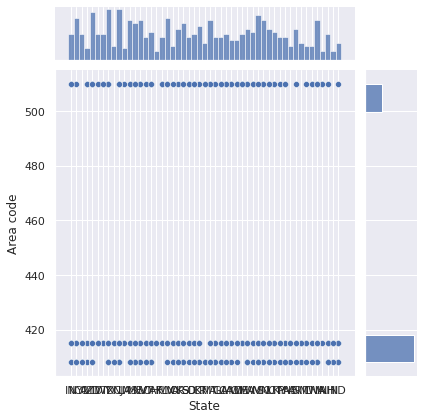

In [63]:
sns.jointplot(churned_df['State'],churned_df["Area code"])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


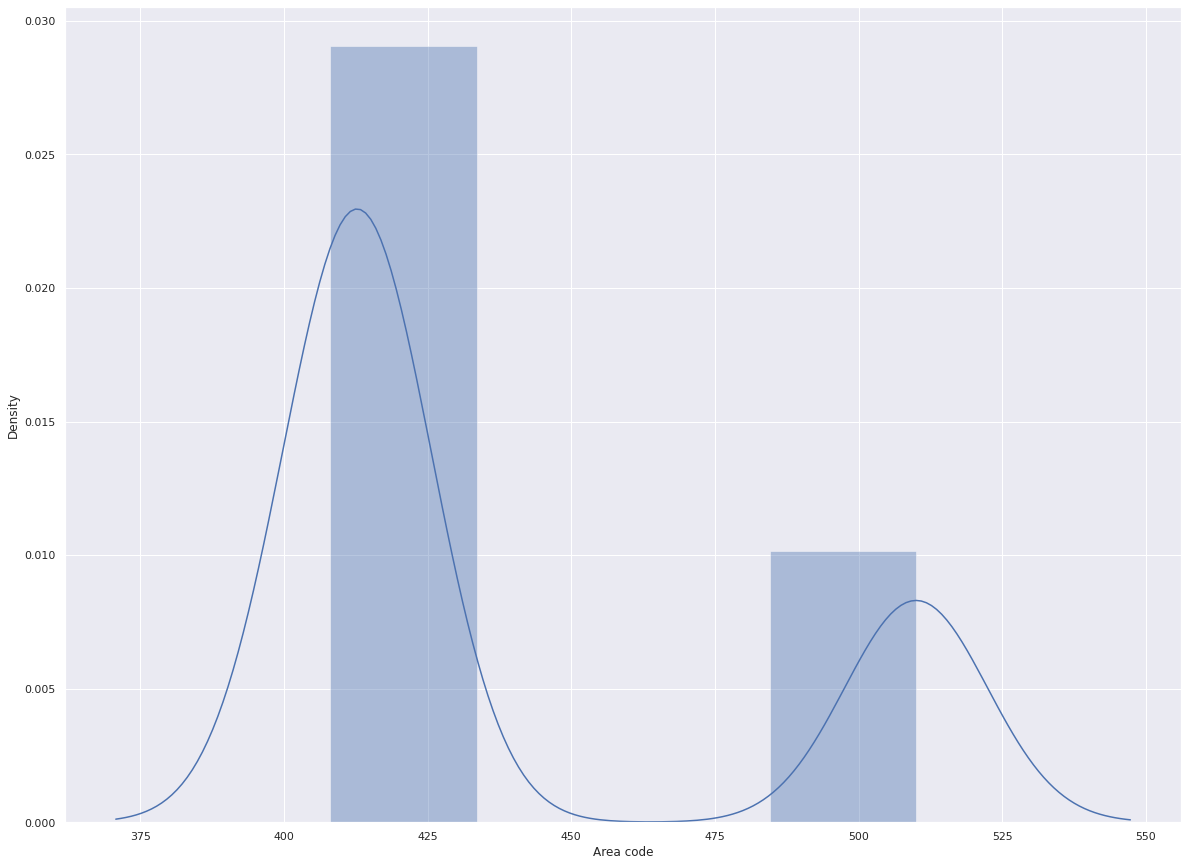

In [64]:
sns.distplot(churned_df["Area code"],hist=True)

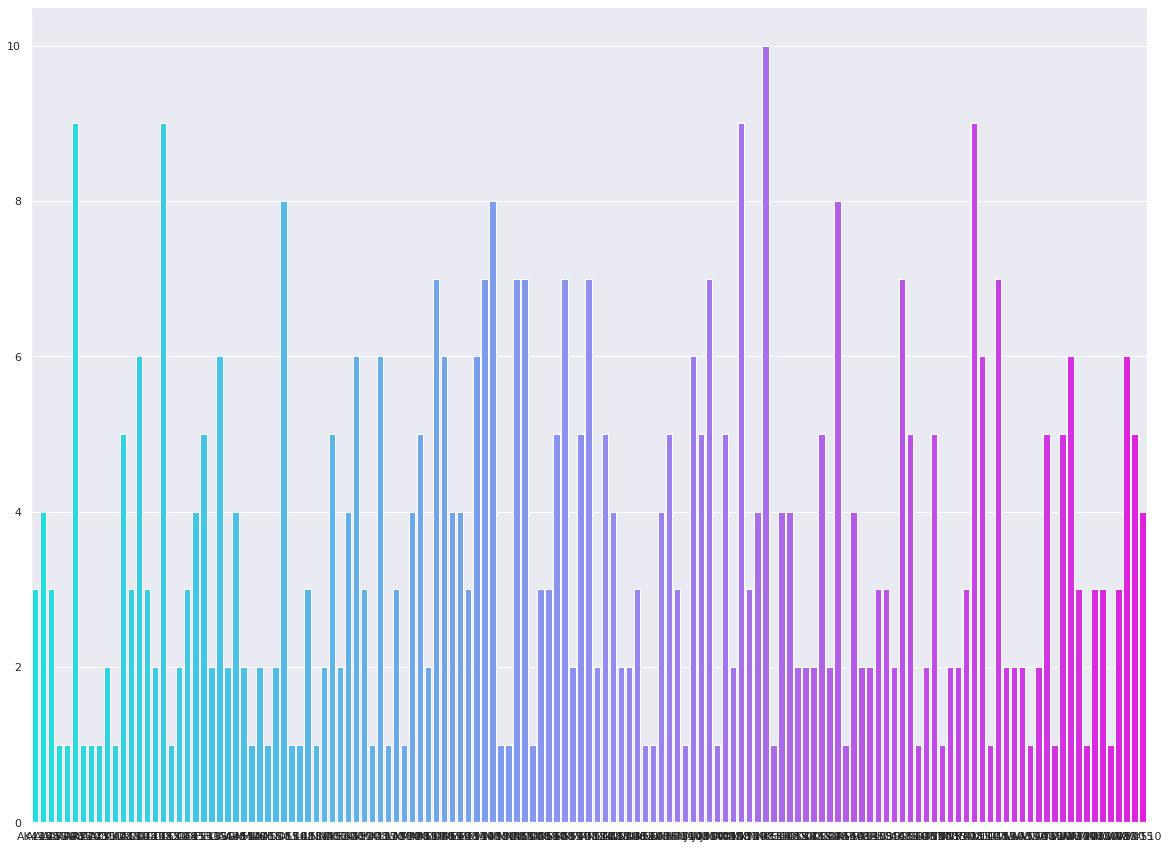

In [65]:
state,count = np.unique(churned_df["State + Arcode"],return_counts=True)
sns.barplot(x=state,y=count, palette = 'cool')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


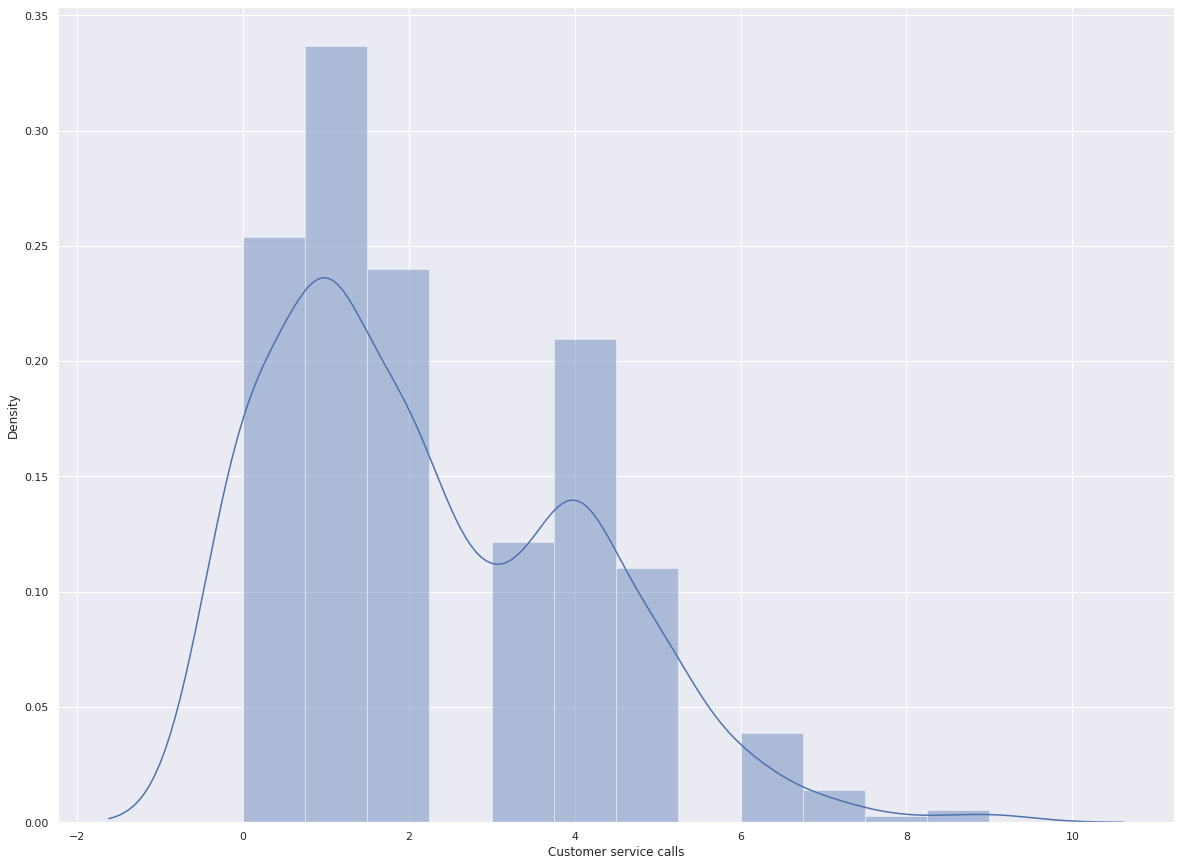

In [66]:
#Customer Service Calls
sns.distplot(churned_df['Customer service calls'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


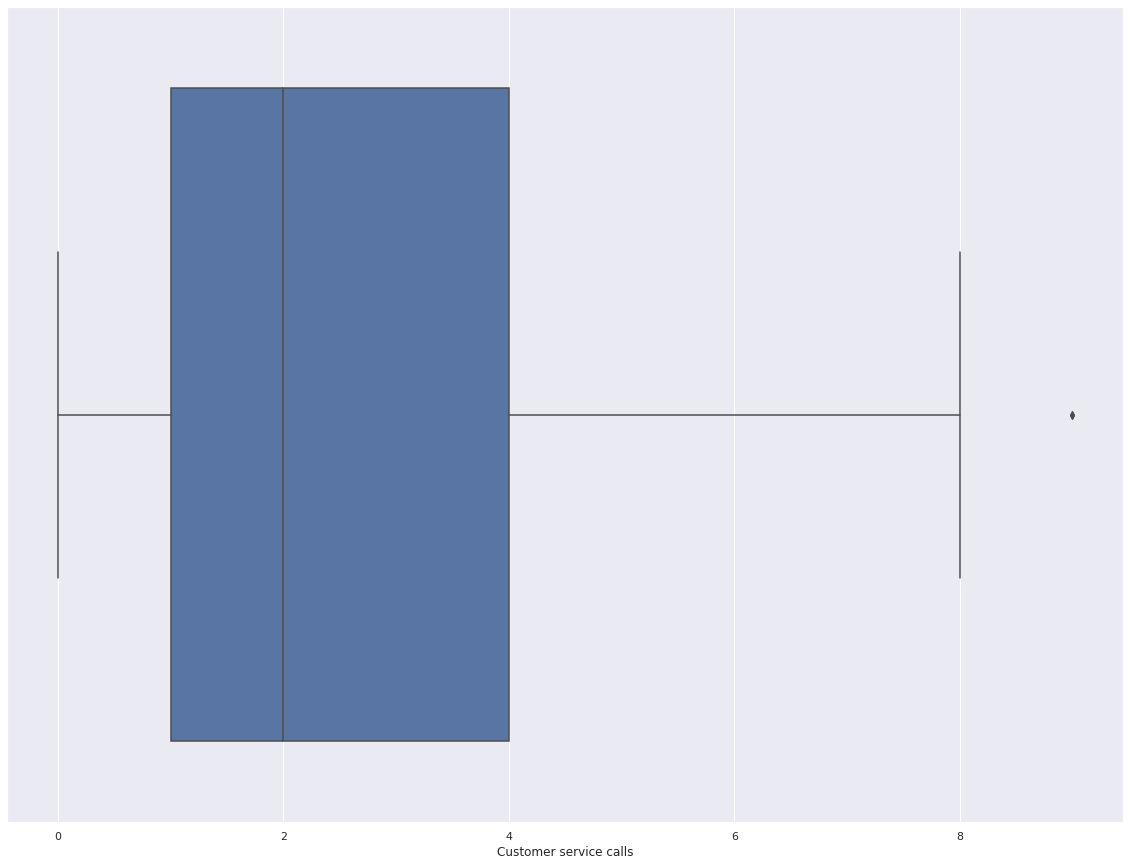

In [67]:
sns.boxplot(churned_df['Customer service calls'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


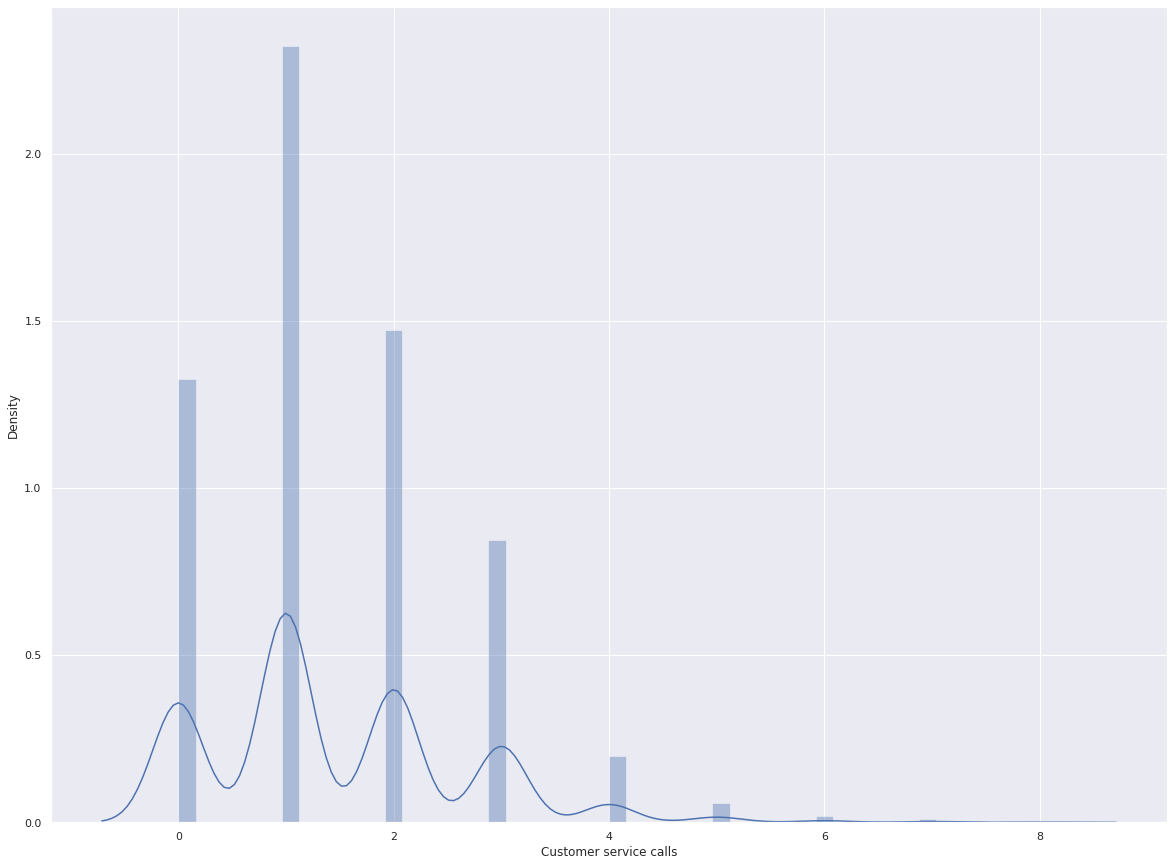

In [68]:
sns.distplot(retend_df['Customer service calls'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


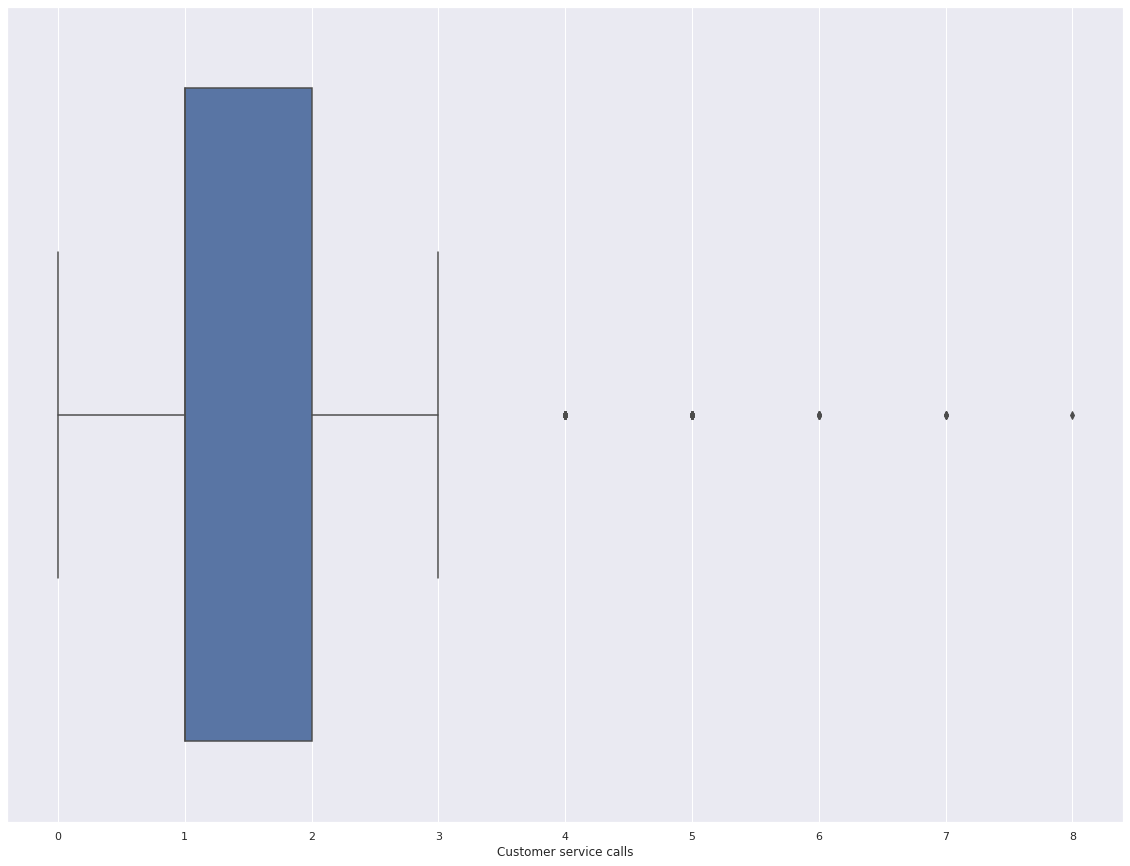

In [69]:
sns.boxplot(retend_df['Customer service calls'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


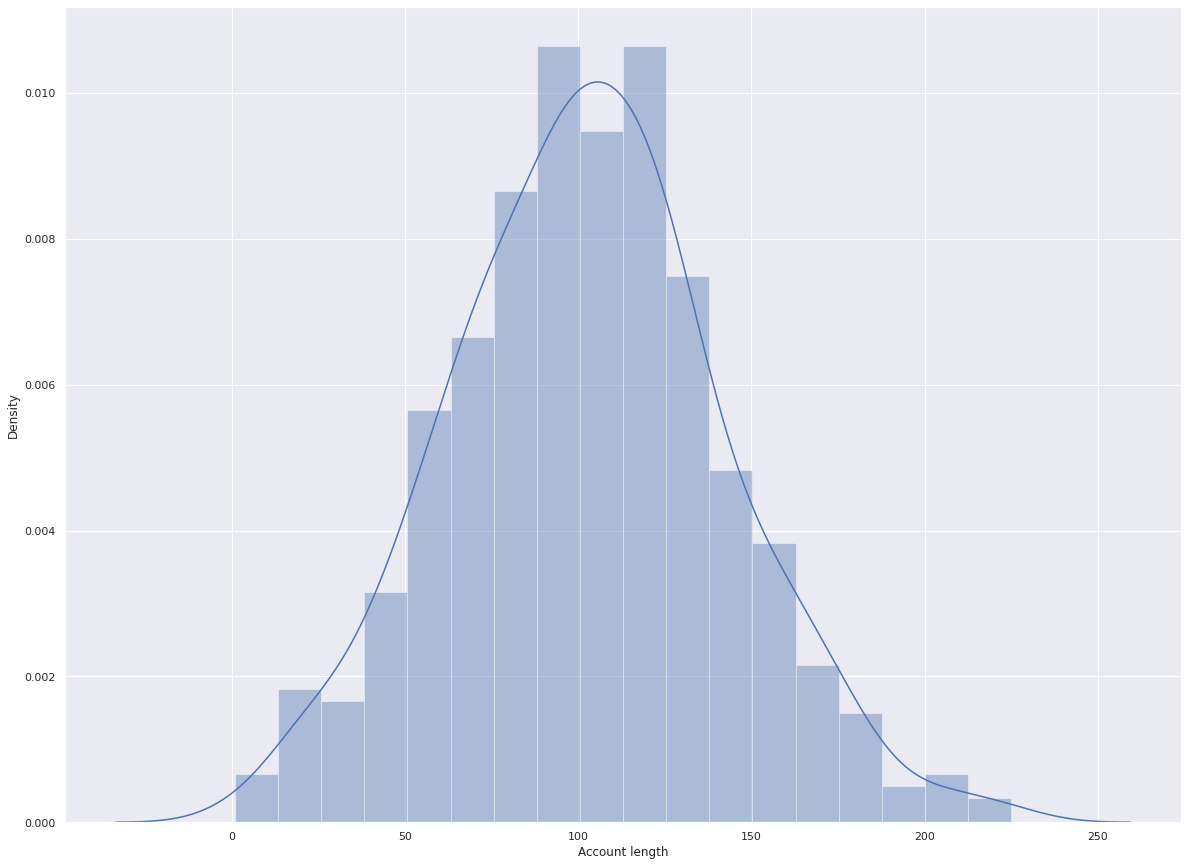

In [70]:
# No Of Days after Left Service
sns.distplot(churned_df['Account length'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


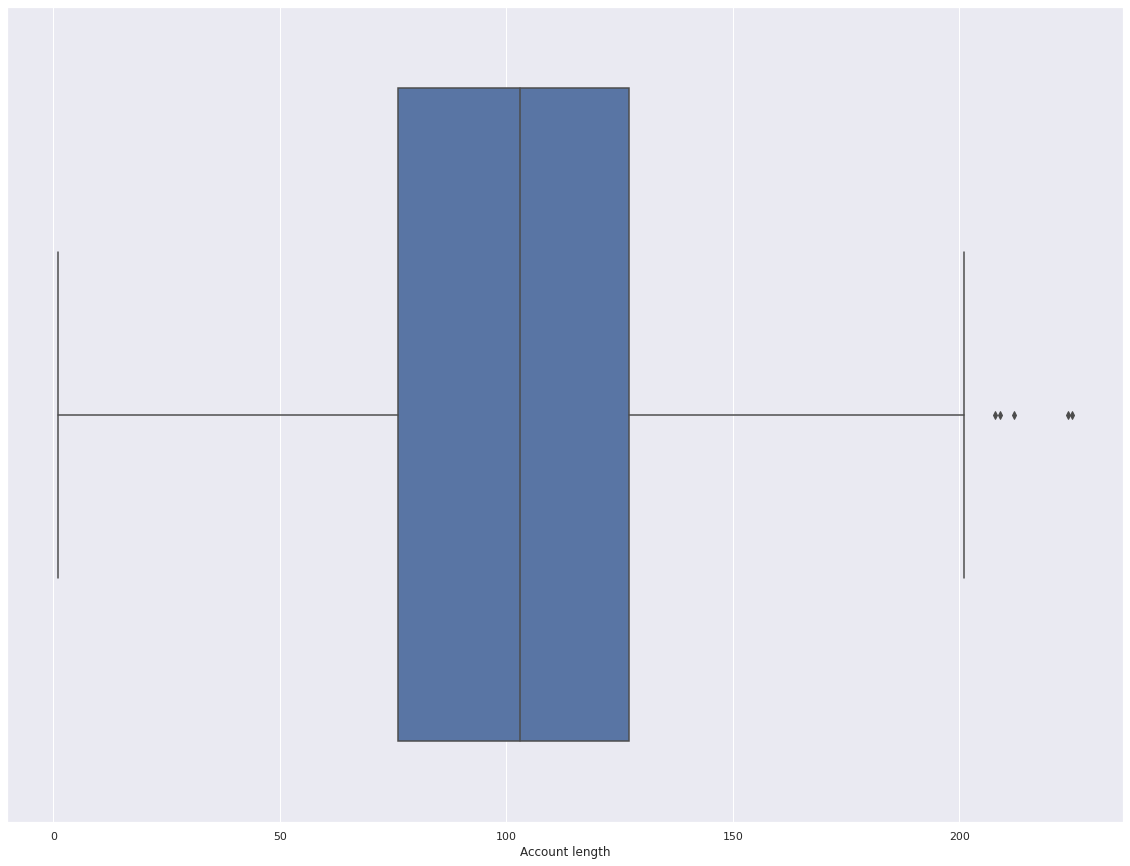

In [71]:
sns.boxplot(churned_df['Account length'])

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


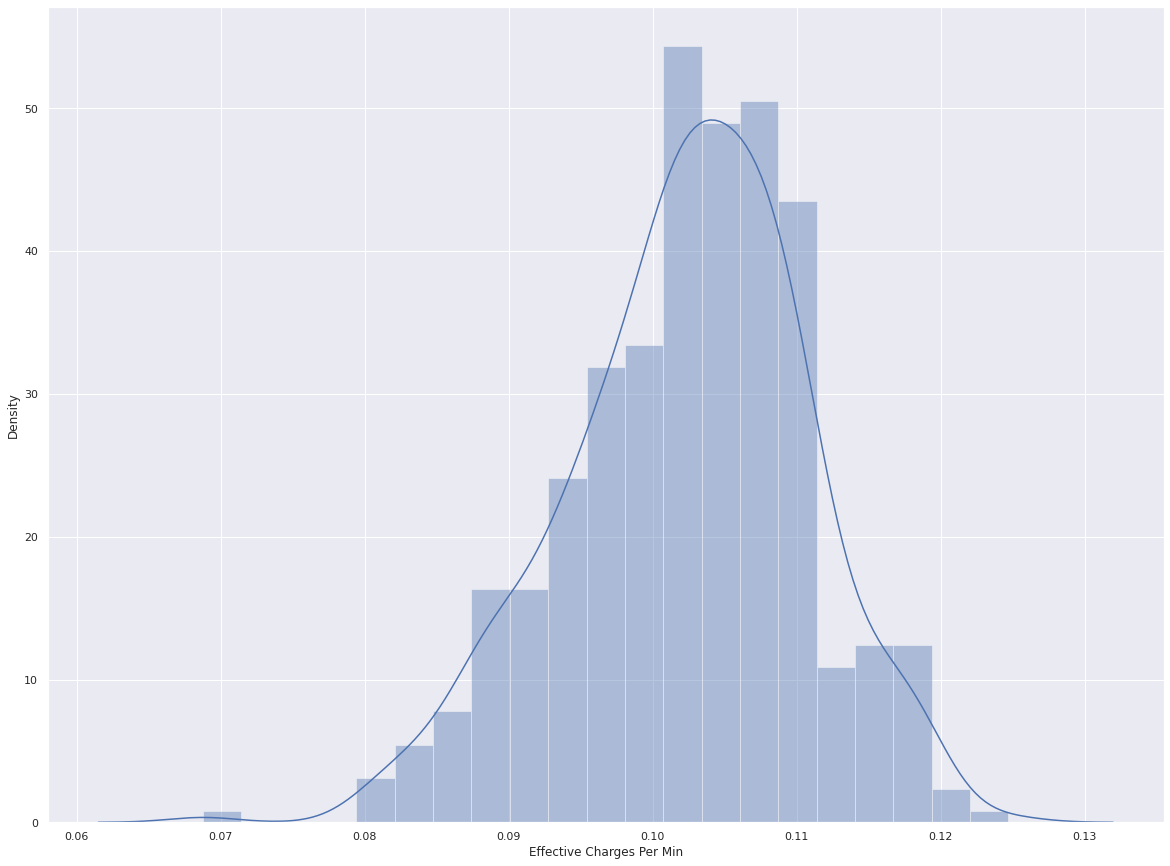

In [72]:
sns.distplot(churned_df['Effective Charges Per Min'],hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


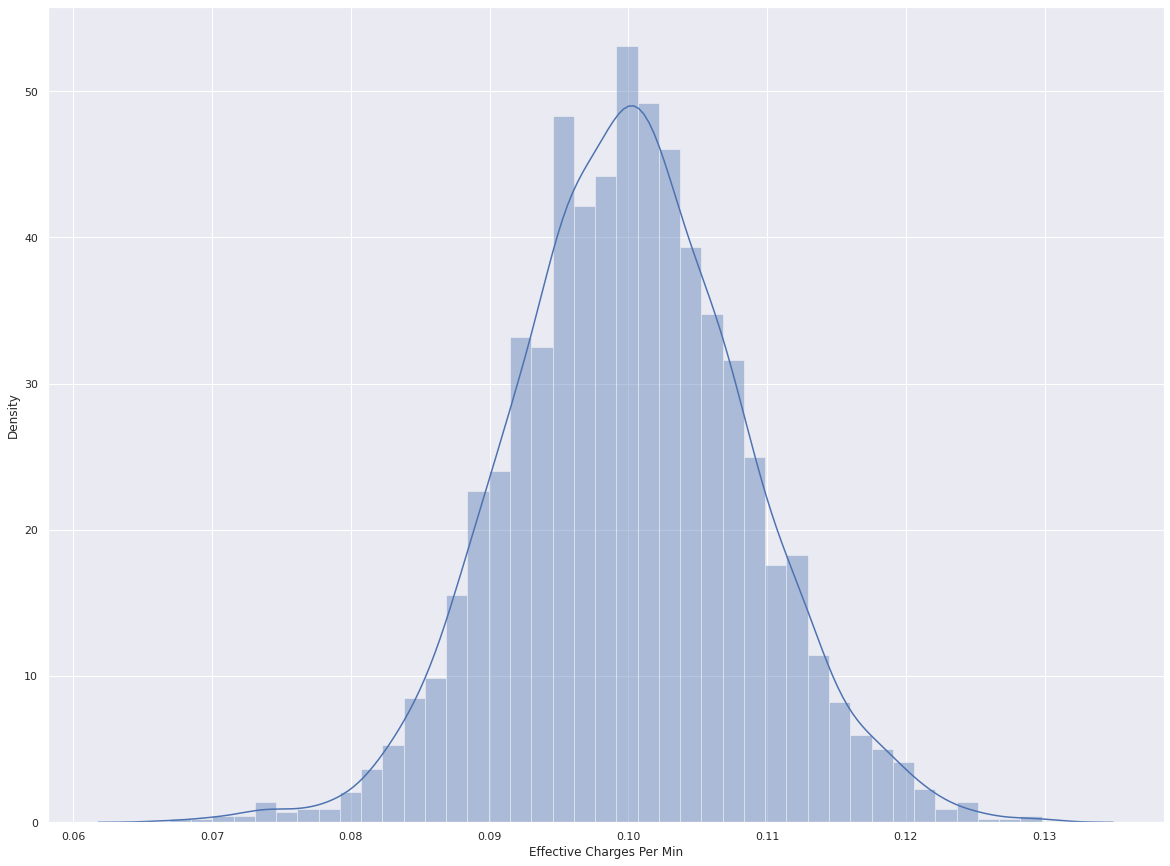

In [73]:
sns.distplot(retend_df['Effective Charges Per Min'],hist=True)